C:\Users\jakub\AppData\Local\Temp\ipykernel_3736\2536674259.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE_Validation_Scaled", ci=None, palette="viridis")
C:\Users\jakub\AppData\Local\Temp\ipykernel_3736\2536674259.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE_Validation_Scaled", ci=None, palette="viridis")


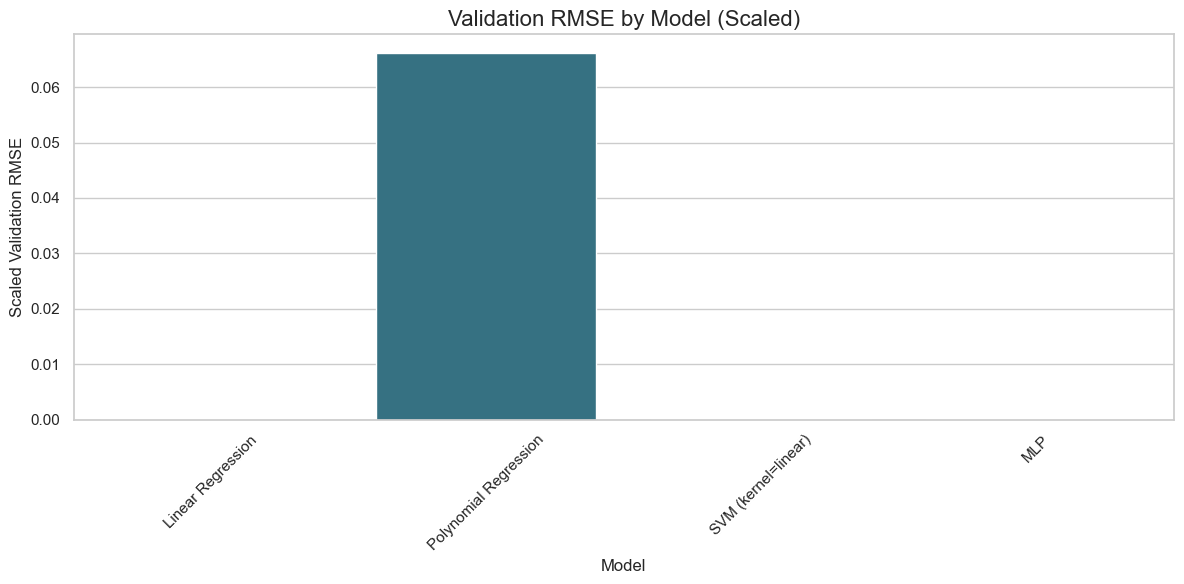

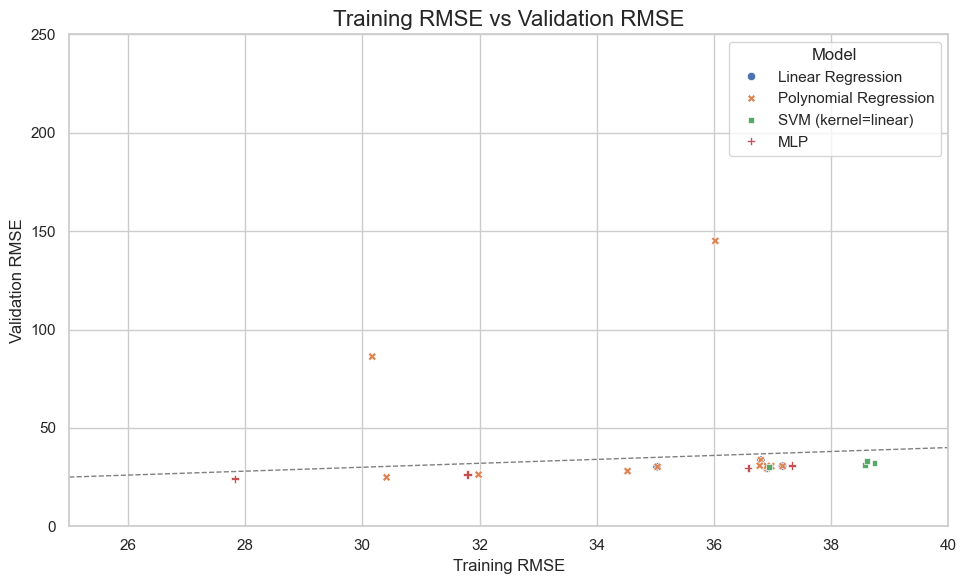

C:\Users\jakub\AppData\Local\Temp\ipykernel_3736\2536674259.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\jakub\AppData\Local\Temp\ipykernel_3736\2536674259.py:55: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


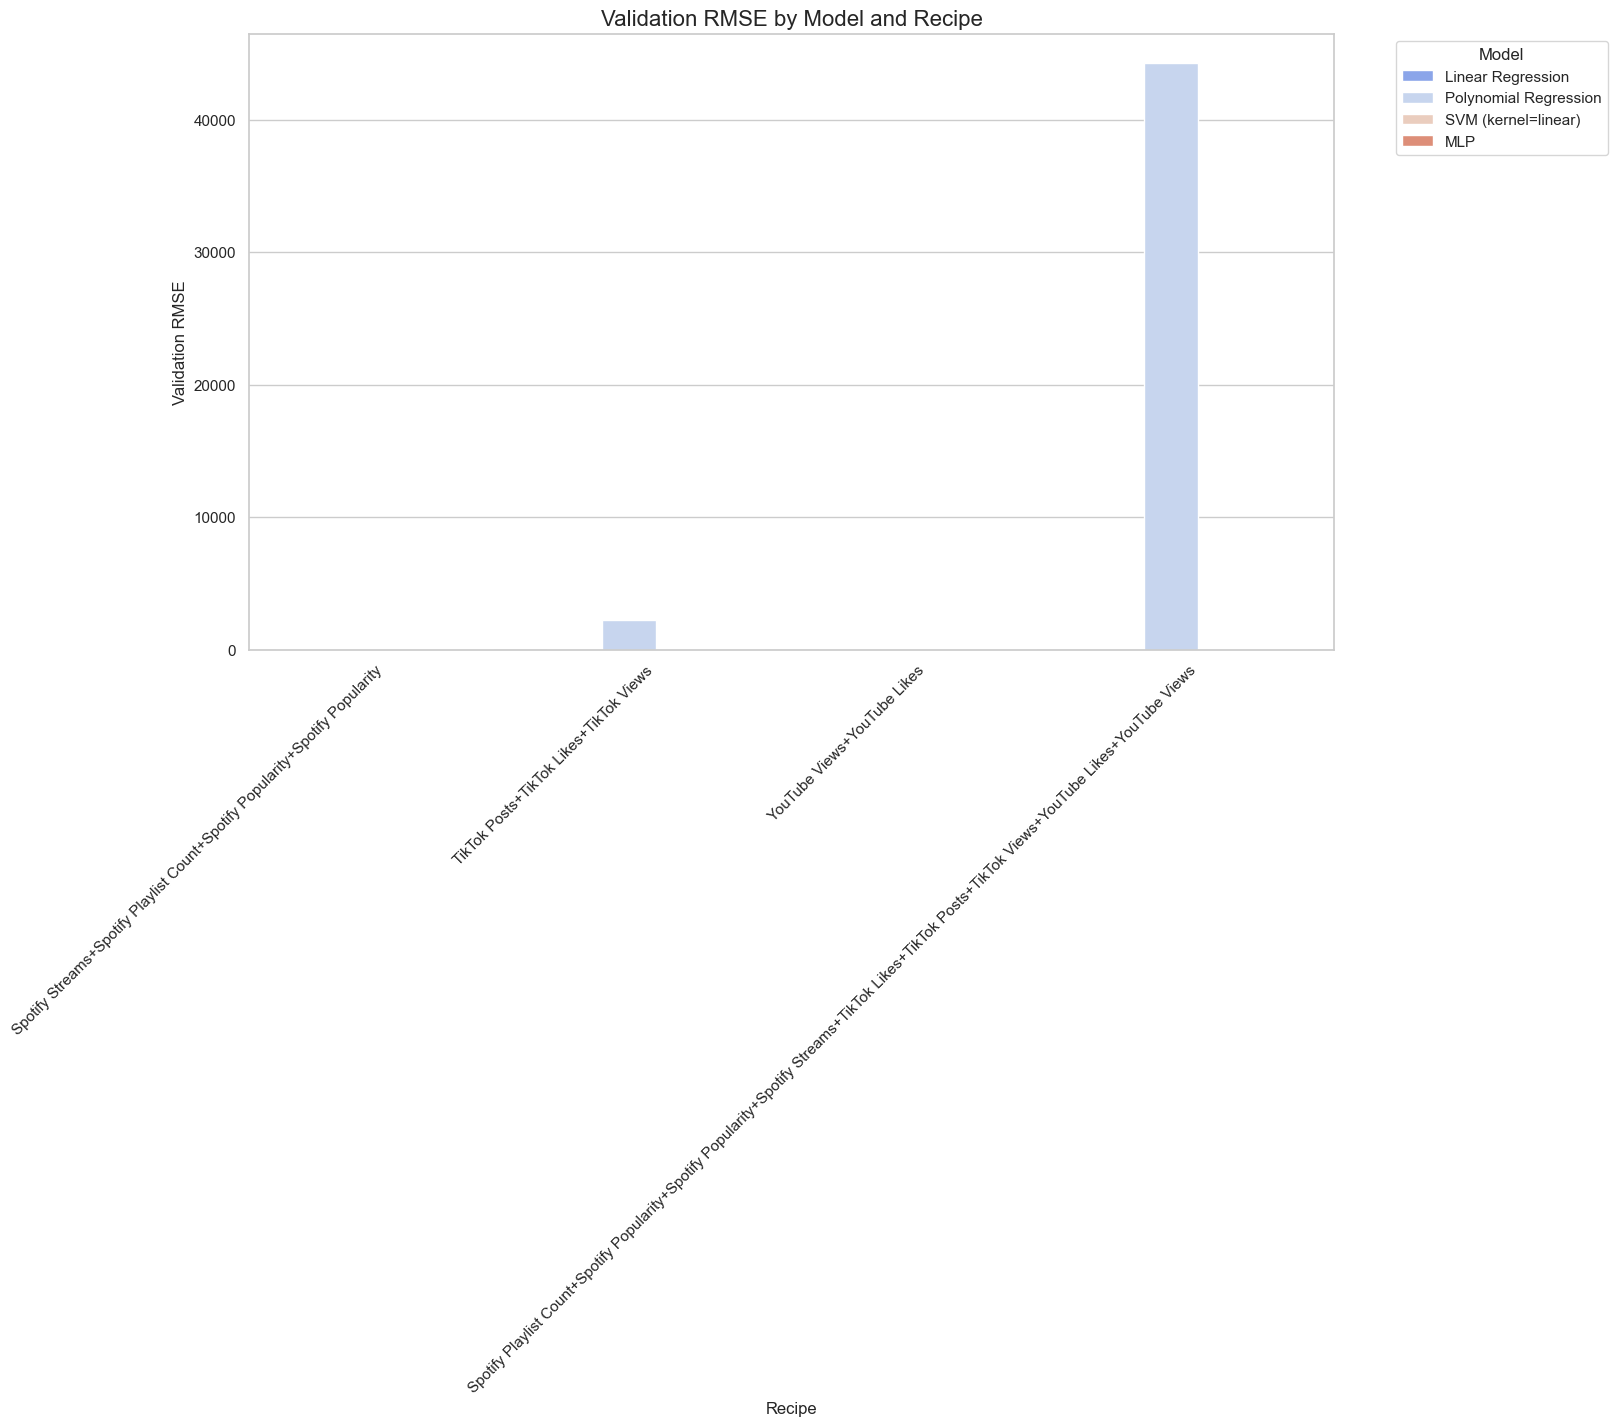

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# Load the results dataset
results_df = pd.read_csv("results.csv")

# Min-Max Scale the Validation RMSE
scaler = MinMaxScaler()
results_df["RMSE_Validation_Scaled"] = scaler.fit_transform(results_df[["RMSE_Validation"]])

# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Scaled Bar Plot: Validation RMSE by Model
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Model", y="RMSE_Validation_Scaled", ci=None, palette="viridis")
plt.title("Validation RMSE by Model (Scaled)", fontsize=16)
plt.ylabel("Scaled Validation RMSE", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("scaled_validation_rmse_by_model.png")  # Save the plot
plt.show()

# 2. Scatter Plot: Training RMSE vs Validation RMSE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x="RMSE_Train", y="RMSE_Validation", hue="Model", style="Model", palette="deep")
plt.title("Training RMSE vs Validation RMSE", fontsize=16)
plt.xlabel("Training RMSE", fontsize=12)
plt.ylabel("Validation RMSE", fontsize=12)
plt.axline((0, 0), slope=1, color="gray", linestyle="--", linewidth=1)  # y=x reference line
plt.legend(title="Model")
plt.tight_layout()
plt.savefig("train_vs_validation_rmse.png")  # Save the plot
plt.ylim(0, 250)
plt.xlim(25, 40)
plt.show()

# 3. Grouped Bar Chart: RMSE by Model and Recipe
plt.figure(figsize=(14, 8))
sns.barplot(
    data=results_df,
    x="Recipe",
    y="RMSE_Validation",
    hue="Model",
    ci=None,
    palette="coolwarm"
)
plt.title("Validation RMSE by Model and Recipe", fontsize=16)
plt.ylabel("Validation RMSE", fontsize=12)
plt.xlabel("Recipe", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("validation_rmse_by_model_and_recipe.png")  # Save the plot
plt.show()
